## Naive Bayes

Naive Bayes uses principles from the field of statistics to make predictions. This chapter will introduce the basics of Bayesian methods while exploring how to apply these techniques to iPhone-like destination suggestions.

### Computing probabilities
The where9am data frame contains 91 days (thirteen weeks) worth of data in which Brett recorded his location at 9am each day as well as whether the daytype was a weekend or weekday.

Using the conditional probability formula below, you can compute the probability that Brett is working in the office, given that it is a weekday.

 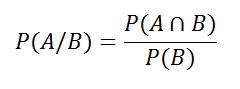

Calculations like these are the basis of the Naive Bayes destination prediction model you'll develop in later exercises.

In [2]:
# url = "https://assets.datacamp.com/production/repositories/718/datasets/571628c39048df59c40c9dcfba146a2cf7a4a0e3/locations.csv"
# where9am  = read.csv(url)
where9am = read.csv("locations.csv")

head(where9am)

# Compute P(A) 
p_A <- nrow(subset(where9am, location == "office")) / nrow(where9am)

# Compute P(B)
p_B <- nrow(subset(where9am, daytype == "weekday")) / nrow(where9am)

# Compute the observed P(A and B)
p_AB <- nrow(subset(where9am, location == "office" & daytype == "weekday")) / nrow(where9am)

# Compute P(A | B) and print its value
p_A_given_B <- p_AB / p_B
p_A_given_B

month,day,weekday,daytype,hour,hourtype,location
1,4,wednesday,weekday,0,night,home
1,4,wednesday,weekday,1,night,home
1,4,wednesday,weekday,2,night,home
1,4,wednesday,weekday,3,night,home
1,4,wednesday,weekday,4,night,home
1,4,wednesday,weekday,5,night,home


[1] 0.2628205

In [6]:
# check that P(office and weekend) = 0
p_OW <- nrow(subset(where9am, location == "office" & daytype == "weekend")) / nrow(where9am)
p_OW
# check that P(office | weekend) = 0.
p_W <- nrow(subset(where9am, daytype == "weekend")) / nrow(where9am)
p_OgW <- p_OW / p_W
p_OgW



[1] 0

[1] 0

### A simple Naive Bayes location model
The previous exercises showed that the probability that Brett is at work or at home at 9am is highly dependent on whether it is the weekend or a weekday.

To see this finding in action, use the where9am data frame to build a Naive Bayes model on the same data.

You can then use this model to predict the future: where does the model think that Brett will be at 9am on Thursday and at 9am on Saturday?

The data frame where9am is available in your workspace. This dataset contains information about Brett's location at 9am on different days.

In [18]:
# Load the naivebayes package
# install.packages("naivebayes")
library(naivebayes)

# Build the location prediction model
locmodel <- naive_bayes(location ~ daytype, data = where9am)

# Predict location

predict(locmodel, data.frame(c("weekday")))

predict(locmodel, data.frame(c("weekend")))


Warning message:
"naive_bayes(): Feature daytype - zero probabilities are present. Consider Laplace smoothing."Warning message:
"predict.naive_bayes(): only 0 feature(s) out of 1 defined in the naive_bayes object "locmodel" are used for prediction.
"Warning message:
"predict.naive_bayes(): no feature in the newdata corresponds to probability tables in the object. Classification is done based on the prior probabilities"

[1] home
Levels: appointment campus home office restaurant store theater

Warning message:
"predict.naive_bayes(): only 0 feature(s) out of 1 defined in the naive_bayes object "locmodel" are used for prediction.
"Warning message:
"predict.naive_bayes(): no feature in the newdata corresponds to probability tables in the object. Classification is done based on the prior probabilities"

[1] home
Levels: appointment campus home office restaurant store theater

### Examining "raw" probabilities
The naivebayes package offers several ways to peek inside a Naive Bayes model.

Typing the name of the model object provides the a priori (overall) and conditional probabilities of each of the model's predictors. If one were so inclined, you might use these for calculating posterior (predicted) probabilities by hand.

Alternatively, R will compute the posterior probabilities for you if the type = "prob" parameter is supplied to the predict() function.

Using these methods, examine how the model's predicted 9am location probability varies from day-to-day. The model locmodel that you fit in the previous exercise is in your workspace.

In [19]:
# Examine the location prediction model
print(locmodel)

# Obtain the predicted probabilities 

predict(locmodel, data.frame(c("weekday")), type = "prob")

predict(locmodel, data.frame(c("weekend")), type = "prob")


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = location ~ daytype, data = where9am)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

appointment      campus        home      office  restaurant       store 
0.003663004 0.032967033 0.717948718 0.187728938 0.037087912 0.017857143 
    theater 
0.002747253 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: daytype (Bernoulli) 
--------------------------------------------------------------------------------- 
         
daytype   appointment    campus      home    office restaurant     store
  weekday   0.5000000 1.0000000 0.6275510 1.0000000  0.7901235 0.6666667
  

Warning message:
"predict.naive_bayes(): only 0 feature(s) out of 1 defined in the naive_bayes object "locmodel" are used for prediction.
"Warning message:
"predict.naive_bayes(): no feature in the newdata corresponds to probability tables in the object. Posterior probabilities are equal to prior probabilities."

appointment,campus,home,office,restaurant,store,theater
0.003663004,0.03296703,0.7179487,0.1877289,0.03708791,0.01785714,0.002747253


Warning message:
"predict.naive_bayes(): only 0 feature(s) out of 1 defined in the naive_bayes object "locmodel" are used for prediction.
"Warning message:
"predict.naive_bayes(): no feature in the newdata corresponds to probability tables in the object. Posterior probabilities are equal to prior probabilities."

appointment,campus,home,office,restaurant,store,theater
0.003663004,0.03296703,0.7179487,0.1877289,0.03708791,0.01785714,0.002747253


### A more sophisticated location model
The locations dataset records Brett's location every hour for 13 weeks. Each hour, the tracking information includes the daytype (weekend or weekday) as well as the hourtype (morning, afternoon, evening, or night).

Using this data, build a more sophisticated model to see how Brett's predicted location not only varies by the day of week but also by the time of day. The dataset locations is already loaded in your workspace.

You can specify additional independent variables in your formula using the + sign (e.g. y ~ x + b).

In [39]:
# Build a NB model of location
locmodel <- naive_bayes(location ~ daytype + hourtype, data = where9am)

# Predict Brett's location on a weekday afternoon
predict(locmodel, where9am[13, c("daytype", "hourtype")])

# Predict Brett's location on a weekday evening
predict(locmodel, where9am[19, c("daytype", "hourtype")])



Warning message:
"naive_bayes(): Feature daytype - zero probabilities are present. Consider Laplace smoothing."Warning message:
"naive_bayes(): Feature hourtype - zero probabilities are present. Consider Laplace smoothing."

[1] office
Levels: appointment campus home office restaurant store theater

[1] home
Levels: appointment campus home office restaurant store theater

### Preparing for unforeseen circumstances
While Brett was tracking his location over 13 weeks, he never went into the office during the weekend. Consequently, the joint probability of P(office and weekend) = 0.

Explore how this impacts the predicted probability that Brett may go to work on the weekend in the future. Additionally, you can see how using the Laplace correction will allow a small chance for these types of unforeseen circumstances.


In [40]:
# Observe the predicted probabilities for a weekend afternoon
predict(locmodel, where9am[85, c("daytype", "hourtype")], type = "prob")

# Build a new model using the Laplace correction
locmodel2 <- naive_bayes(location ~ daytype + hourtype, data = where9am, laplace = 1)

# Observe the new predicted probabilities for a weekend afternoon
predict(locmodel2, where9am[85, c("daytype", "hourtype")], type = "prob")

appointment,campus,home,office,restaurant,store,theater
0.02462883,0.0004802622,0.8439145,0.003349521,0.1111338,0.01641922,7.38865e-05


appointment,campus,home,office,restaurant,store,theater
0.02013872,0.006187715,0.8308154,0.007929249,0.1098743,0.01871085,0.006343697
